# Explorative Data Analysis

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import utils.DataSplitter
import seaborn as sns
import numpy as np

In [2]:
lines = ['1A', '2A', '3A', '4A', '5A', '6A']
days = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag']
months = range(1, 12+1)
hours = range(0, 23+1)

## Passenger data

### 60 min

In [3]:
train60 = utils.DataSplitter.getTrainData(60, start_date='2020-01-01', hours_to_exclude=[], diff=True)
train60.head(10)

,date,hour,peakHour,year,quarter,Q1,Q2,Q3,Q4,month,...,diffLag17,diffLag18,diffLag19,diffLag20,diffLag40,diffLag60,diffLag80,diffLag100,diffLag120,diffLag140
0,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-01,1,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2020-01-01,2,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2020-01-01,3,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2020-01-01,4,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2020-01-01,5,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,2020-01-01,6,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2020-01-01,7,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,2020-01-01,8,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2020-01-01,9,0,2020,1,1,0,0,0,Januar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


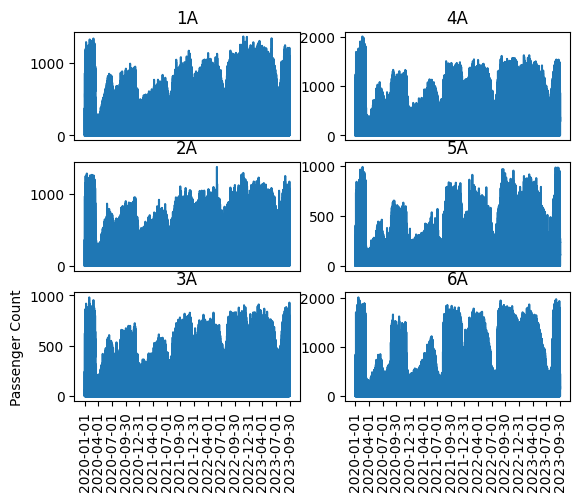

In [6]:
# inspect passenger count

# specific line for all dates
df1A = train60[train60['line'] == '1A'].reset_index(drop=True)
df2A = train60[train60['line'] == '2A'].reset_index(drop=True)
df3A = train60[train60['line'] == '3A'].reset_index(drop=True)
df4A = train60[train60['line'] == '4A'].reset_index(drop=True)
df5A = train60[train60['line'] == '5A'].reset_index(drop=True)
df6A = train60[train60['line'] == '6A'].reset_index(drop=True)

# show only n dates per year
dateInterval = int(365*24/4)

fig, ax = plt.subplots(3, 2)
ax[0, 0].plot(df1A.index, df1A['passengersBoarding'], '-')
ax[0, 0].set_title('1A')
ax[0, 0].set_xticks([])

ax[1, 0].plot(df2A.index, df2A['passengersBoarding'], '-')
ax[1, 0].set_title('2A')
ax[1, 0].set_xticks([])

ax[2, 0].plot(df3A.index, df3A['passengersBoarding'], '-')
ax[2, 0].set_title('3A')
ax[2, 0].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)
ax[2, 0].set_ylabel('Passenger Count')

ax[0, 1].plot(df4A.index, df4A['passengersBoarding'], '-')
ax[0, 1].set_title('4A')
ax[0, 1].set_xticks([])

ax[1, 1].plot(df5A.index, df5A['passengersBoarding'], '-')
ax[1, 1].set_title('5A')
ax[1, 1].set_xticks([])

ax[2, 1].plot(df6A.index, df6A['passengersBoarding'], '-')
ax[2, 1].set_title('6A')
ax[2, 1].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)

plt.show()

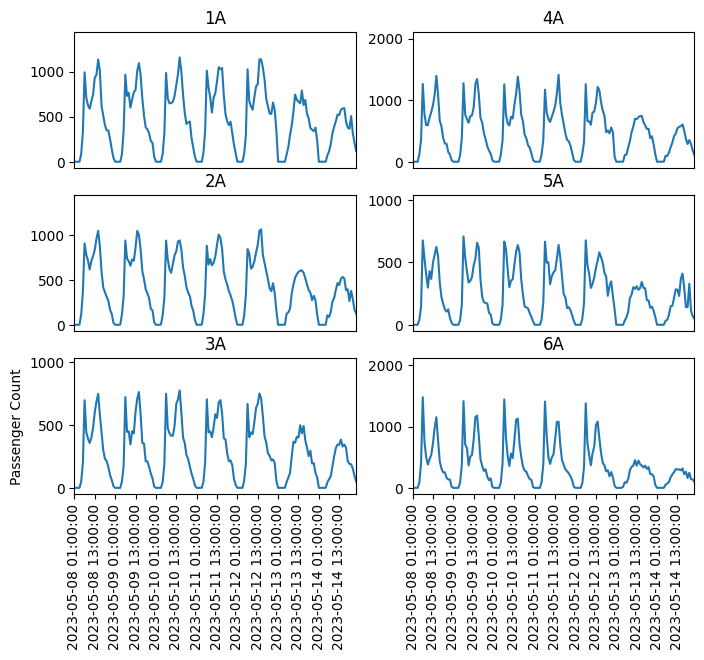

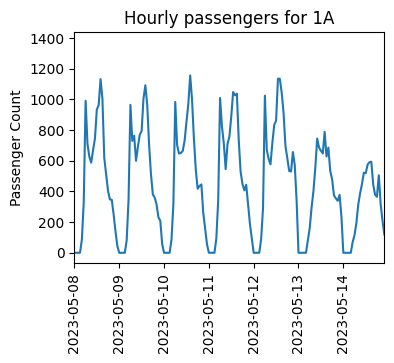

In [63]:
# inspect passenger count for 1 specific week

# specific line for all dates
df1A = train60[train60['line'] == '1A'].reset_index(drop=True)
df2A = train60[train60['line'] == '2A'].reset_index(drop=True)
df3A = train60[train60['line'] == '3A'].reset_index(drop=True)
df4A = train60[train60['line'] == '4A'].reset_index(drop=True)
df5A = train60[train60['line'] == '5A'].reset_index(drop=True)
df6A = train60[train60['line'] == '6A'].reset_index(drop=True)

specific_week = df1A[(df1A['datetime'] >= '2023-05-08 01:00:00') & (df1A['datetime'] < '2023-05-15 00:00:00')]

# show only n dates per year
dateInterval = int(365*24/2)

fig, ax = plt.subplots(3, 2, figsize=(8, 6))
ax[0, 0].plot(df1A.index, df1A['passengersBoarding'], '-')
ax[0, 0].set_title('1A')
ax[0, 0].set_xticks([])
ax[0, 0].set_xlim([specific_week.index[0], specific_week.index[-1]])

ax[1, 0].plot(df2A.index, df2A['passengersBoarding'], '-')
ax[1, 0].set_title('2A')
ax[1, 0].set_xticks([])
ax[1, 0].set_xlim([specific_week.index[0], specific_week.index[-1]])

ax[2, 0].plot(df3A.index, df3A['passengersBoarding'], '-')
ax[2, 0].set_title('3A')
ax[2, 0].set_xticks(specific_week.index[::12], specific_week['datetime'].tolist()[::12], rotation=90)
ax[2, 0].set_ylabel('Passenger Count')
ax[2, 0].set_xlim([specific_week.index[0], specific_week.index[-1]])

ax[0, 1].plot(df4A.index, df4A['passengersBoarding'], '-')
ax[0, 1].set_title('4A')
ax[0, 1].set_xticks([])
ax[0, 1].set_xlim([specific_week.index[0], specific_week.index[-1]])

ax[1, 1].plot(df5A.index, df5A['passengersBoarding'], '-')
ax[1, 1].set_title('5A')
ax[1, 1].set_xticks([])
ax[1, 1].set_xlim([specific_week.index[0], specific_week.index[-1]])

ax[2, 1].plot(df6A.index, df6A['passengersBoarding'], '-')
ax[2, 1].set_title('6A')
ax[2, 1].set_xticks(specific_week.index[::12], specific_week['datetime'].tolist()[::12], rotation=90)
ax[2, 1].set_xlim([specific_week.index[0], specific_week.index[-1]])

plt.show()


fig, ax = plt.subplots(1, figsize=(4, 3))
ax.plot(df1A.index, df1A['passengersBoarding'], '-')
ax.set_title('Hourly passengers for 1A')
ax.set_xticks(specific_week.index[::24], specific_week['date'].tolist()[::24], rotation=90)
ax.set_ylabel('Passenger Count')
ax.set_xlim([specific_week.index[0], specific_week.index[-1]])
plt.show()

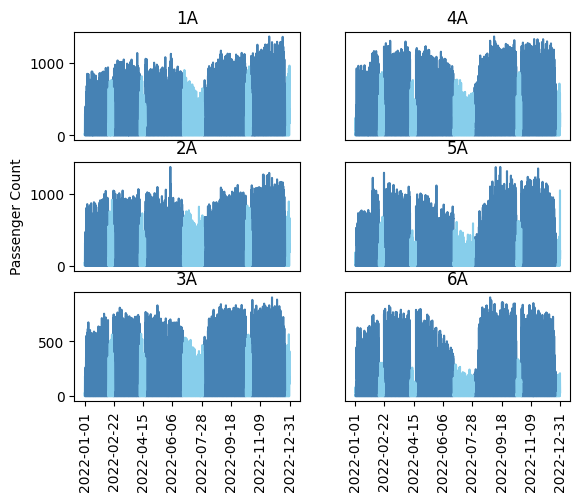

In [40]:
# same as above from 2022-01-01 to 2022-12-31 with vacations colored in red
# specific line for all dates
df_subset = deepcopy(train60)
df_subset['isVacation'] = df_subset['fallVacation'] + df_subset['christmasVacation'] + df_subset['winterVacation'] + df_subset['easterVacation'] + df_subset['summerVacation']

df1A = df_subset[(df_subset['line'] == '1A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)
df2A = df_subset[(df_subset['line'] == '2A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)
df3A = df_subset[(df_subset['line'] == '3A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)
df4A = df_subset[(df_subset['line'] == '4A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)
df5A = df_subset[(df_subset['line'] == '5A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)
df6A = df_subset[(df_subset['line'] == '6A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)

# show only n dates per year
dateInterval = int(365*24/7)

fig, ax = plt.subplots(3, 2)
inVacationColor = 'skyblue'
outofVacationColor = 'steelblue'
for col, label, color in [('christmasVacation', 1, inVacationColor), ('isVacation', 0, outofVacationColor), ('fallVacation', 1, inVacationColor), ('winterVacation', 1, inVacationColor), ('easterVacation', 1, inVacationColor), ('summerVacation', 1, inVacationColor)]:
    df_subset = df1A[df1A[col] == label]
    ax[0, 0].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[0, 0].set_title('1A')
    ax[0, 0].set_xticks([])

    df_subset = df2A[df2A[col] == label]
    ax[1, 0].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[1, 0].set_title('2A')
    ax[1, 0].set_xticks([])
    ax[1, 0].set_ylabel('Passenger Count')

    df_subset = df3A[df3A[col] == label]
    ax[2, 0].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[2, 0].set_title('3A')
    ax[2, 0].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)

    df_subset = df4A[df4A[col] == label]
    ax[0, 1].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[0, 1].set_title('4A')
    ax[0, 1].set_xticks([])
    ax[0, 1].set_yticks([])

    df_subset = df5A[df5A[col] == label]
    ax[1, 1].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[1, 1].set_title('5A')
    ax[1, 1].set_xticks([])
    ax[1, 1].set_yticks([])

    df_subset = df6A[df6A[col] == label]
    ax[2, 1].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[2, 1].set_title('6A')
    ax[2, 1].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)
    ax[2, 1].set_yticks([])

plt.show()

In [9]:
# check if events have the busiest hours

# outside peakHour
# 1A, Northside
# 2A, Northside
# 3A, no events
# 4A, Aarhus Festival, Northside
# 5A, AGF_M
# 6A, Northside

# inside peakHour
# 1A, no events
# 2A, Northside
# 3A, Aarhus Festival
# 4A, no events
# 5A, no events
# 6A, no events

df_subset = deepcopy(train60)
df_subset = df_subset[(df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index(drop=True)
df_subset = df_subset[df_subset['line'] == '1A']
df_subset = df_subset[df_subset['peakHour'] == 1]
df_subset = df_subset.reset_index(drop=True)

df_subset.nlargest(15, 'passengersBoarding')

,date,hour,peakHour,year,quarter,Q1,Q2,Q3,Q4,month,...,diffLag17,diffLag18,diffLag19,diffLag20,diffLag40,diffLag60,diffLag80,diffLag100,diffLag120,diffLag140
2058,2022-11-25,15,1,2022,4,0,0,0,1,November,...,3.0,-26.0,-76.0,-190.0,-60.0,0.0,745.0,193.0,-3.0,-109.0
2202,2022-12-19,15,1,2022,4,0,0,0,1,December,...,-117.0,-94.0,-34.0,102.0,-13.0,0.0,744.0,56.0,-11.0,-225.0
2057,2022-11-25,14,1,2022,4,0,0,0,1,November,...,-26.0,-76.0,-190.0,-219.0,-192.0,0.0,256.0,-96.0,50.0,-203.0
2059,2022-11-25,16,1,2022,4,0,0,0,1,November,...,-136.0,3.0,-26.0,-76.0,-85.0,0.0,-381.0,-11.0,-8.0,-44.0
2148,2022-12-09,15,1,2022,4,0,0,0,1,December,...,-80.0,33.0,-110.0,-158.0,-93.0,0.0,599.0,97.0,-47.0,-127.0
2184,2022-12-15,15,1,2022,4,0,0,0,1,December,...,-16.0,-17.0,-67.0,-89.0,-121.0,-1.0,732.0,128.0,23.0,-51.0
2085,2022-11-30,15,1,2022,4,0,0,0,1,November,...,-161.0,18.0,-57.0,-146.0,-118.0,0.0,64.0,166.0,34.0,-190.0
2112,2022-12-05,15,1,2022,4,0,0,0,1,December,...,-33.0,-90.0,20.0,-68.0,99.0,0.0,687.0,59.0,115.0,-146.0
2013,2022-11-18,15,1,2022,4,0,0,0,1,November,...,-93.0,-27.0,34.0,-221.0,-119.0,0.0,772.0,199.0,-5.0,-56.0
2032,2022-11-22,16,1,2022,4,0,0,0,1,November,...,-134.0,-86.0,-50.0,45.0,-79.0,0.0,92.0,161.0,-48.0,20.0


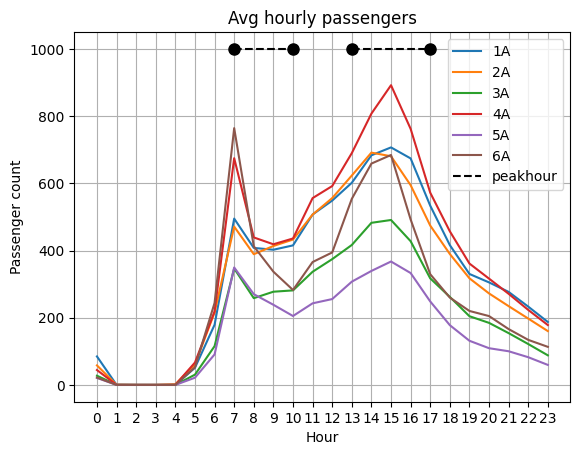

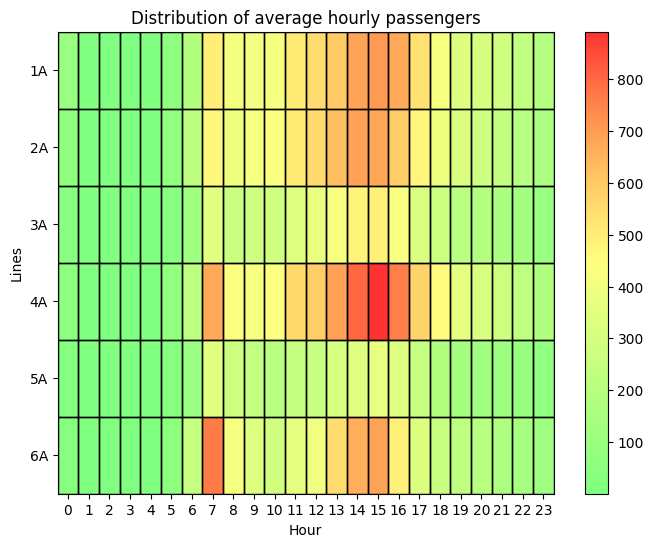

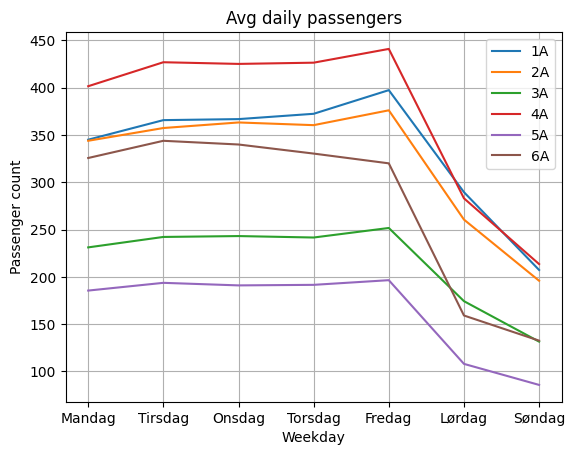

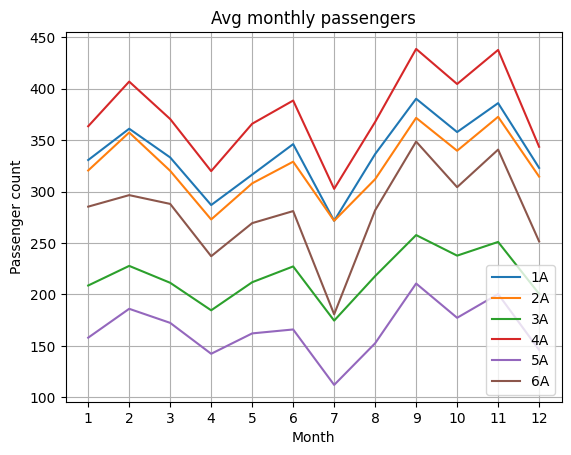

In [19]:
# summary statistics of passengers

summaryTable = train60.groupby(['line', 'hour'])['passengersBoarding'].mean()
summaryTable = summaryTable.reindex(index=[(l, h) for l in lines for h in hours])
#print(summaryTable)
peakHours = pd.unique(train60[train60['peakHour'] == 1]['hour']).tolist()

summaryTable['1A'].plot(label='1A')
summaryTable['2A'].plot(label='2A')
summaryTable['3A'].plot(label='3A')
summaryTable['4A'].plot(label='4A')
summaryTable['5A'].plot(label='5A')
summaryTable['6A'].plot(label='6A')

plt.hlines(y=1000, xmin=7, xmax=10, linestyle='--', color='black', label='peakhour')
plt.hlines(y=1000, xmin=13, xmax=17, linestyle='--', color='black')
plt.plot([7, 10, 13, 17], [1000, 1000, 1000, 1000], 'o', markersize=8, color='black')

plt.xticks(hours)
plt.grid()
plt.legend()
plt.title('Avg hourly passengers')
plt.xlabel('Hour')
plt.ylabel('Passenger count')
plt.show()


from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 1, 0, 0.5), (1, 1, 0, 0.5), (1, 0, 0, 0.8)]
custom_cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)
plt.figure(figsize=(8, 6))
plt.imshow(summaryTable.reset_index().pivot(columns='hour', index='line', values='passengersBoarding'), cmap=custom_cmap, aspect='auto')
for i in range(len(lines)):
    for j in range(len(hours)):
        plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, edgecolor='black', linewidth=1, fill=False))
plt.xticks(np.arange(len(hours)), hours)
plt.yticks(np.arange(len(lines)), lines)
plt.xlabel('Hour')
plt.ylabel('Lines')
plt.colorbar()
plt.title('Distribution of average hourly passengers')
plt.show()


summaryTable = train60.groupby(['line', 'weekDay'])['passengersBoarding'].mean()
summaryTable = summaryTable.reindex(index=[(l, d) for l in lines for d in days])
#print(summaryTable)
summaryTable['1A'].plot(label='1A')
summaryTable['2A'].plot(label='2A')
summaryTable['3A'].plot(label='3A')
summaryTable['4A'].plot(label='4A')
summaryTable['5A'].plot(label='5A')
summaryTable['6A'].plot(label='6A')
plt.grid()
plt.legend()
plt.title('Avg daily passengers')
plt.xlabel('Weekday')
plt.ylabel('Passenger count')
plt.show()


summaryTable = train60.groupby(['line', 'monthNumber'])['passengersBoarding'].mean()
summaryTable = summaryTable.reindex(index=[(l, m) for l in lines for m in months])
#print(summaryTable)
summaryTable['1A'].plot(label='1A')
summaryTable['2A'].plot(label='2A')
summaryTable['3A'].plot(label='3A')
summaryTable['4A'].plot(label='4A')
summaryTable['5A'].plot(label='5A')
summaryTable['6A'].plot(label='6A')
plt.xticks(months)
plt.grid()
plt.legend()
plt.title('Avg monthly passengers')
plt.xlabel('Month')
plt.ylabel('Passenger count')
plt.show()

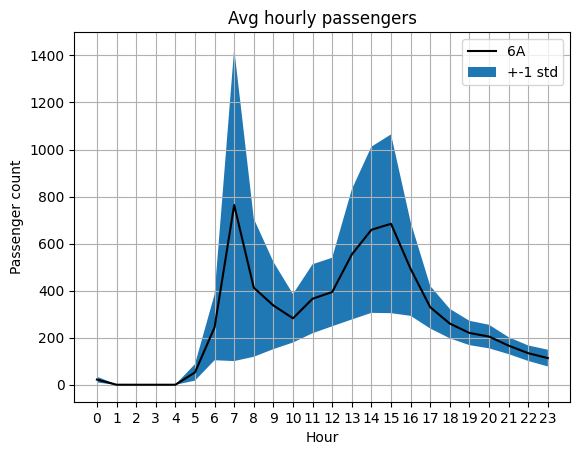

In [11]:
# summary statistics with standard deviation
lineToPlot = '6A'

summaryTable = train60.groupby(['line', 'hour'])['passengersBoarding'].describe()
summaryTable = summaryTable.reindex(index=[(l, h) for l in lines for h in hours])
plt.plot(summaryTable['mean'][lineToPlot].index, summaryTable['mean'][lineToPlot], label=lineToPlot, color='black')
plt.fill_between(summaryTable['mean'][lineToPlot].index, summaryTable['mean'][lineToPlot] + summaryTable['std'][lineToPlot], summaryTable['mean'][lineToPlot] - summaryTable['std'][lineToPlot], label='+-1 std')

plt.xticks(hours)
plt.grid()
plt.legend()
plt.title('Avg hourly passengers')
plt.xlabel('Hour')
plt.ylabel('Passenger count')
plt.show()

### 30 min

In [12]:
train30 = utils.DataSplitter.getTrainData(30, start_date='2020-01-01', hours_to_exclude=[], diff=True)
train30.head()

,date,hour,minute,peakHour,year,quarter,Q1,Q2,Q3,Q4,...,diffLag37,diffLag38,diffLag39,diffLag40,diffLag80,diffLag120,diffLag160,diffLag200,diffLag240,diffLag280
0,2020-01-01,0,0,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-01,0,30,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2020-01-01,1,0,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2020-01-01,1,30,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2020-01-01,2,0,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


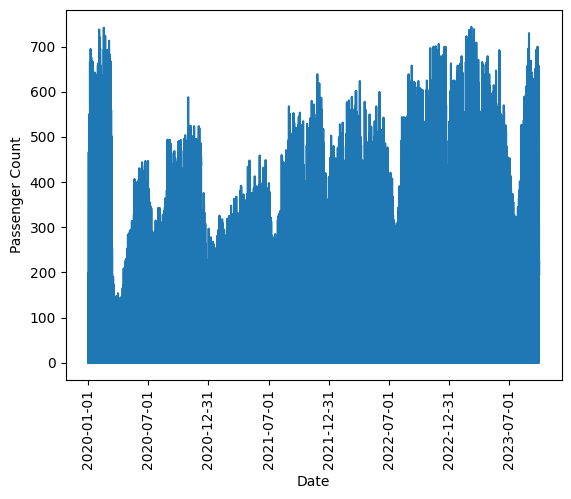

In [13]:
# specific line for all dates
df_subset = train30.loc[(train30['line'] == '1A')]
df_subset = df_subset.reset_index(drop=True)

# show only n dates per year
dateInterval = int(365*24/1)
plt.plot(df_subset.index, df_subset['passengersBoarding'], '-')
plt.xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['date'][::dateInterval], rotation=90)
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

### 15 min

In [14]:
train15 = utils.DataSplitter.getTrainData(15, start_date='2020-01-01', hours_to_exclude=[], diff=True)
train15.head()

,date,hour,minute,peakHour,year,quarter,Q1,Q2,Q3,Q4,...,diffLag77,diffLag78,diffLag79,diffLag80,diffLag160,diffLag240,diffLag320,diffLag400,diffLag480,diffLag560
0,2020-01-01,0,0,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-01,0,15,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2020-01-01,0,30,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2020-01-01,0,45,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2020-01-01,1,0,0,2020,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


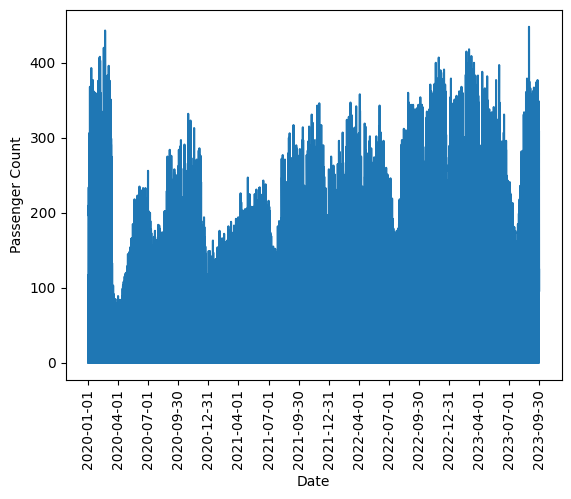

In [15]:
# specific line for all dates
df_subset = train15.loc[(train15['line'] == '1A')]
df_subset = df_subset.reset_index(drop=True)

# show only n dates per year
dateInterval = int(365*24/1)
plt.plot(df_subset.index, df_subset['passengersBoarding'], '-')
plt.xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['date'][::dateInterval], rotation=90)
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

## ClimateData

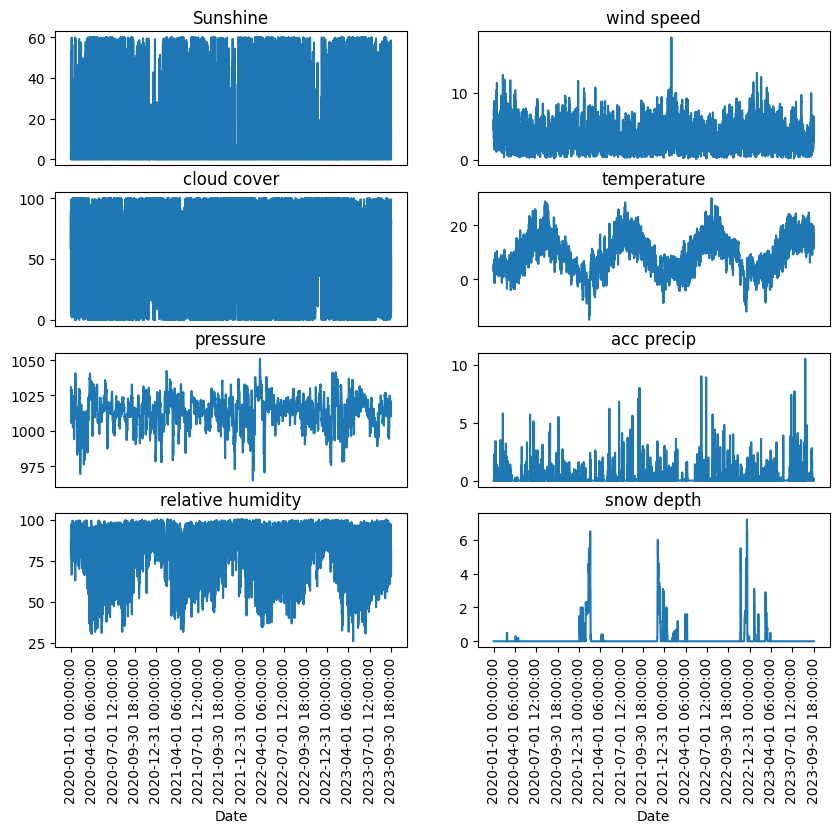

In [16]:
# show weather parameters in train set

df_subset = deepcopy(train60[train60['line'] == '1A'])
df_subset = df_subset.reset_index(drop=True)

dateInterval = int(365*24/4)
fig, ax = plt.subplots(4, 2, figsize=(10, 8))

ax[0, 0].plot(df_subset.index, df_subset['bright_sunshine'], '-')
ax[0, 0].set_title('Sunshine')
ax[0, 0].set_xticks([])

ax[1, 0].plot(df_subset.index, df_subset['mean_cloud_cover'], '-')
ax[1, 0].set_title('cloud cover')
ax[1, 0].set_xticks([])

ax[2, 0].plot(df_subset.index, df_subset['mean_pressure'], '-')
ax[2, 0].set_xticks([])
ax[2, 0].set_title('pressure')

ax[3, 0].plot(df_subset.index, df_subset['mean_relative_hum'], '-')
ax[3, 0].set_title('relative humidity')
ax[3, 0].set_xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['datetime'][::dateInterval], rotation=90)
ax[3, 0].set_xlabel('Date')

ax[0, 1].plot(df_subset.index, df_subset['mean_wind_speed'], '-')
ax[0, 1].set_title('wind speed')
ax[0, 1].set_xticks([])

ax[1, 1].plot(df_subset.index, df_subset['mean_temp'], '-')
ax[1, 1].set_xticks([])
ax[1, 1].set_title('temperature')

ax[2, 1].plot(df_subset.index, df_subset['acc_precip'], '-')
ax[2, 1].set_xticks([])
ax[2, 1].set_title('acc precip')

ax[3, 1].plot(df_subset.index, df_subset['snow_depth'], '-')
ax[3, 1].set_xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['datetime'][::dateInterval], rotation=90)
ax[3, 1].set_title('snow depth')
ax[3, 1].set_xlabel('Date')

plt.show()


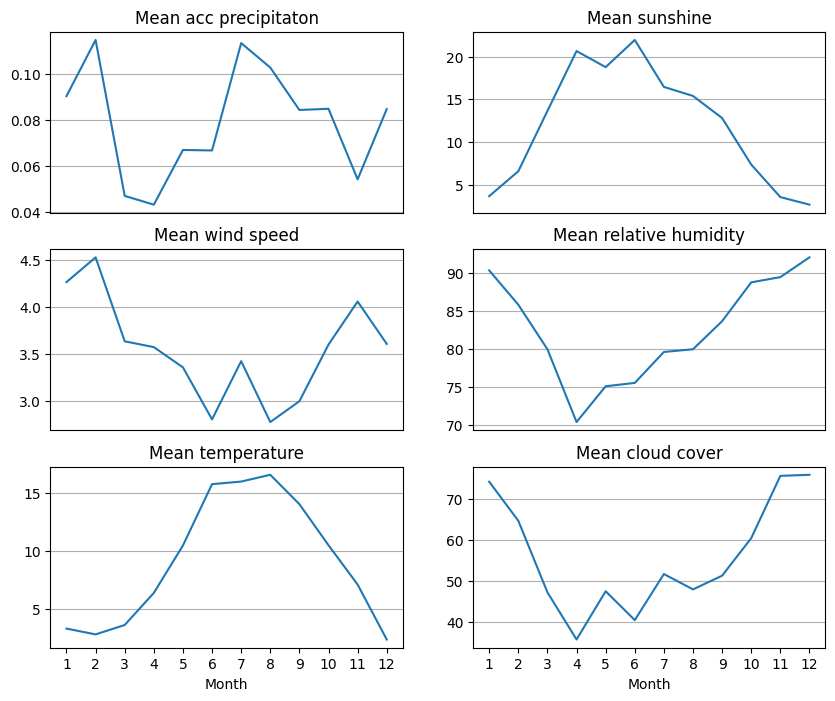

In [17]:
df_subset = train60[train60['line'] == '1A'][['monthNumber', 'acc_precip', 'mean_wind_speed', 'mean_temp', 'bright_sunshine', 'mean_cloud_cover', 'mean_relative_hum']]
summaryTable = df_subset.groupby(['monthNumber'])[['acc_precip', 'mean_wind_speed', 'mean_temp', 'bright_sunshine', 'mean_cloud_cover', 'mean_relative_hum']].describe()
summaryTable = summaryTable.reindex(index=[h for h in hours])

fig, ax = plt.subplots(3, 2, figsize=(10, 8))
ax[0, 0].plot(summaryTable['acc_precip']['mean'].index, summaryTable['acc_precip']['mean'])
ax[0, 0].set_xticks([])
ax[0, 0].set_title('Mean acc precipitaton')
ax[0, 0].grid()

ax[1, 0].plot(summaryTable['mean_wind_speed']['mean'].index, summaryTable['mean_wind_speed']['mean'])
ax[1, 0].set_xticks([])
ax[1, 0].set_title('Mean wind speed')
ax[1, 0].grid()

ax[2, 0].plot(summaryTable['mean_temp']['mean'].index, summaryTable['mean_temp']['mean'])
ax[2, 0].set_xticks(months)
ax[2, 0].set_title('Mean temperature')
ax[2, 0].yaxis.grid()
ax[2, 0].set_xlabel('Month')

ax[0, 1].plot(summaryTable['bright_sunshine']['mean'].index, summaryTable['bright_sunshine']['mean'])
ax[0, 1].set_xticks([])
ax[0, 1].set_title('Mean sunshine')
ax[0, 1].grid()

ax[1, 1].plot(summaryTable['mean_relative_hum']['mean'].index, summaryTable['mean_relative_hum']['mean'])
ax[1, 1].set_xticks([])
ax[1, 1].set_title('Mean relative humidity')
ax[1, 1].grid()

ax[2, 1].plot(summaryTable['mean_cloud_cover']['mean'].index, summaryTable['mean_cloud_cover']['mean'])
ax[2, 1].set_xticks(months)
ax[2, 1].set_title('Mean cloud cover')
ax[2, 1].yaxis.grid()
ax[2, 1].set_xlabel('Month')

plt.show()

# Correlation between routes

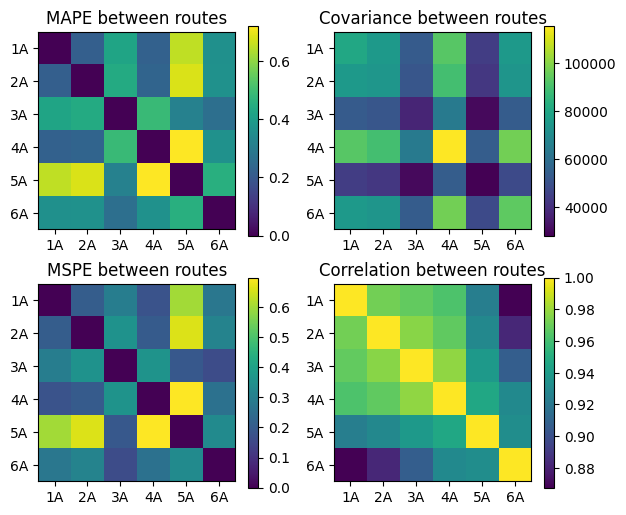

In [18]:
# plot correlation metrics
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError, MeanSquaredPercentageError

dfdict = {line: train60[train60['line'] == line]['passengersBoarding'].values for line in lines}

df = pd.DataFrame(dfdict)

dfMAPE = df.corr()
dfMSPE = df.corr()

MAPE = MeanAbsolutePercentageError(symmetric=True)
MSPE = MeanSquaredPercentageError(symmetric=True)

for line1 in lines:
    for line2 in lines:
        line1values = dfdict[line1]
        line2values = dfdict[line2]
        dfMAPE.loc[line1, line2] = MAPE(line1values, line2values)
        dfMSPE.loc[line1, line2] = MSPE(line1values, line2values)

fig, ax = plt.subplots(2, 2, figsize=(7, 6))

im00 = ax[0, 0].imshow(dfMAPE)
ax[0, 0].set_xticks(range(0, 5+1), lines)
ax[0, 0].set_yticks(range(0, 5+1), lines)
ax[0, 0].set_title('MAPE between routes')
fig.colorbar(im00)

im10 = ax[1, 0].imshow(dfMSPE)
ax[1, 0].set_xticks(range(0, 5+1), lines)
ax[1, 0].set_yticks(range(0, 5+1), lines)
ax[1, 0].set_title('MSPE between routes')
fig.colorbar(im10)

im01 = ax[0, 1].imshow(df.cov())
ax[0, 1].set_xticks(range(0, 5+1), lines)
ax[0, 1].set_yticks(range(0, 5+1), lines)
ax[0, 1].set_title('Covariance between routes')
fig.colorbar(im01)

im11 = ax[1, 1].imshow(df.corr())
ax[1, 1].set_xticks(range(0, 5+1), lines)
ax[1, 1].set_yticks(range(0, 5+1), lines)
ax[1, 1].set_title('Correlation between routes')
fig.colorbar(im11)

plt.show()